# Data Preprocessing Template

import data by connecting to your google drive
```python
from google.colab import drive
drive.mount('/content/drive')
```

## Data Preprocessing

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Importing the dataset

In [2]:
dataset = pd.read_csv('Data.csv')
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [3]:
dataset.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

## Taking care of missing data

In [5]:
# Updated Imputer
from sklearn.impute import SimpleImputer
missingvalues = SimpleImputer(missing_values = np.nan, strategy = 'mean', verbose = 0)
missingvalues = missingvalues.fit(X[:, 1:3])
X[:, 1:3]=missingvalues.transform(X[:, 1:3])

In [6]:
print (X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding categorical data

In [7]:
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [8]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X), dtype=np.float)
# Encoding Y data
y = LabelEncoder().fit_transform(y)

In [9]:
print(X)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 4.40000000e+01
  7.20000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 2.70000000e+01
  4.80000000e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 3.00000000e+01
  5.40000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 3.80000000e+01
  6.10000000e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 4.00000000e+01
  6.37777778e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 3.50000000e+01
  5.80000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 3.87777778e+01
  5.20000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 4.80000000e+01
  7.90000000e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 5.00000000e+01
  8.30000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 3.70000000e+01
  6.70000000e+04]]


## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
X_original = X_train
y_original = y_train

## Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))

In [13]:
sc_X.scale_

array([5.00000000e-01, 3.30718914e-01, 4.84122918e-01, 5.80754883e+00,
       9.53485120e+03])

In [14]:
sc_X.mean_

array([5.00000000e-01, 1.25000000e-01, 3.75000000e-01, 3.84722222e+01,
       6.25972222e+04])

In [15]:
sc_y.scale_

array([0.48412292])

In [16]:
sc_y.mean_

array([0.625])

In [17]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


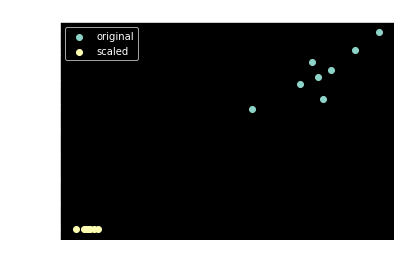

In [18]:
plt.scatter(X_original[:,-2], X_original[:,-1])
plt.scatter(X_train[:,-2], X_train[:,-1])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title("Scaled data Vs Original data")
plt.legend(['original', 'scaled'])
plt.show()

After scaling the data is centered around the (0, 0).